# Assesment - Universiteiten wereldwijd

## 1. Introduction

Ik heb voor de dataset van twee onderzoeksinstituten gekozen: de THE en QS. Beide datasets waren te downloaden, die van QS moest ik wel aanvragen via de mail. De instituten raten elk jaar universiteiten wereldwijd en maken daar een lijst van. Ik wil gaan kijken of er een verband is tussen bepaalde scores, zoals het aantal mannen en vrouwen op een universiteit, en hoe hoog een school in de lijst belandt. Stel dat dat mogelijk is, zouden de universiteiten beter hun best kunnen doen om bijvoorbeeld meer vrouwen binnen de school te krijgen.

Mijn onderzoeksvraag ziet er als volgt uit: 'Kan je voorspellen hoe goed een universiteit zal scoren in de toekomst?'. Door de scholen in te delen binnen categoriën hoop ik deze verbanden te kunnen vinden. 

## 2. Dataset

Ik heb de dataset van THE gevonden op Kaggle; dit was een nieuwe dataset waardoor er geen voorbeeld code was (https://www.kaggle.com/matheusgratz/world-university-rankings-2021). De dataset van QS heb ik via de mail aangevraagd (https://www.topuniversities.com/university-rankings/world-university-rankings/2022)

In [56]:
import seaborn as sns
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import statistics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures 

In [2]:
df1 = pd.read_csv("universities_ranking.csv") # Dataset van THE
df2 = pd.read_csv("2021_QS_World_University_Rankings_Results_public_version.csv") # Dataset van QS

In [3]:
df1.head() # Bekijken van een klein deel van de dataset

,ranking,title,location,number students,students staff ratio,perc intl students,gender ratio,overall score,teaching score,research score,citations score,industry income score,intl outlook score
0,1,University of Oxford,United Kingdom,"20,774",11.1,41%,46 : 54,95.6,91.3,99.6,98.0,68.7,96.4
1,2,Stanford University,United States,"16,223",7.4,23%,44 : 56,94.9,92.2,96.7,99.9,90.1,79.5
2,3,Harvard University,United States,"21,261",9.3,25%,49 : 51,94.8,94.4,98.8,99.4,46.8,77.7
3,4,California Institute of Technology,United States,"2,238",6.3,33%,36 : 64,94.5,92.5,96.9,97.0,92.7,83.6
4,5,Massachusetts Institute of Technology,United States,"11,276",8.4,34%,39 : 61,94.4,90.7,94.4,99.7,90.4,90.0


In [4]:
df2.head() # Bekijken van een klein deel van de dataset

,ranking,institution name,code,country,size,focus,res.,age,status,academic reputation,employer reputation,faculty student,citations per faculty,international faculty,international students,overall
0,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,B,100.0,100.0,100.0,100.0,100.0,91.4,100
1,2,University of Oxford,UK,United Kingdom,L,FC,VH,5,A,100.0,100.0,100.0,96.0,99.5,98.5,99.5
2,3=,Stanford University,US,United States,L,FC,VH,5,B,100.0,100.0,100.0,99.9,99.8,67.0,98.7
3,3=,University of Cambridge,UK,United Kingdom,L,FC,VH,5,A,100.0,100.0,100.0,92.1,100.0,97.7,98.7
4,5,Harvard University,US,United States,L,FC,VH,5,B,100.0,100.0,99.1,100.0,84.2,70.1,98


Het valt nu al op dat de datasets een andere top 5 hebben: bij de eerste staat University of Oxford op nummer één en bij de tweede staat Massachusetts Institute of Technology op nummer één. Ook verschillen de noteringen van de universiteiten. Daar moet ik later naar kijken tijdens het mergen. Eerst bekijk ik of er veel NA/s zijn.

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ranking                1526 non-null   int64  
 1   title                  1526 non-null   object 
 2   location               1526 non-null   object 
 3   number students        1526 non-null   object 
 4   students staff ratio   1526 non-null   float64
 5   perc intl students     1526 non-null   object 
 6   gender ratio           1453 non-null   object 
 7   overall score          1526 non-null   object 
 8   teaching score         1526 non-null   float64
 9   research score         1526 non-null   float64
 10  citations score        1526 non-null   float64
 11  industry income score  1526 non-null   float64
 12  intl outlook score     1526 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 155.1+ KB


De eerste dataset worden verschillende punten gebruikt om de universiteit te beoordelen. De perc intl students zijn het percentage aantal internationale studenten binnen de studie. De gender ratio zijn de verdeling van mannen en vrouwen: het linkergetal is het aantal vrouwen. De teachingscore is het cijfer voor de lessen die gegeven worden (22.000 ondervraagden). De research score is het cijfer voor de onderzoeken en de reputatie die de universiteit daarbij heeft. De citations score gaat om de onderzoeken die de universiteit uitbrengt. Voor de industry income score is gekeken naar mensen uit het werkveld en waar die terecht zijn gekomen. De intl outlook score is de internationale score die de school krijgt van buitenlandse studenten.

Bij deze dataset is alleen de gender-ratio niet volledig. Het scheelt 73 scholen. Dit is wel een onderdeel wat ik graag meeneem in het onderzoek, omdat dit invloed kan hebben op hoe goed een school scoort - misschien scoort een school met meer vrouwen wel hoger dan wanneer er meer mannen zijn. 

In [6]:
df1['gender ratio'].head(20) #Kijken naar de top 20 en NaN's

0     46 : 54
1     44 : 56
2     49 : 51
3     36 : 64
4     39 : 61
5     47 : 53
6     51 : 49
7     50 : 50
8     46 : 54
9     46 : 54
10    39 : 61
11    52 : 48
12    52 : 48
13    32 : 68
14    55 : 45
15    57 : 43
16        NaN
17    59 : 41
18    50 : 50
19    49 : 51
Name: gender ratio, dtype: object

Er zitten geen NAN's in de top 20, waardoor ik er voor kies om deze weg te gooien. NOTE: eerste keer staat er wel een N/A op plek 16, als je die los refresht valt ie weg.

In [7]:
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1525
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ranking                1453 non-null   int64  
 1   title                  1453 non-null   object 
 2   location               1453 non-null   object 
 3   number students        1453 non-null   object 
 4   students staff ratio   1453 non-null   float64
 5   perc intl students     1453 non-null   object 
 6   gender ratio           1453 non-null   object 
 7   overall score          1453 non-null   object 
 8   teaching score         1453 non-null   float64
 9   research score         1453 non-null   float64
 10  citations score        1453 non-null   float64
 11  industry income score  1453 non-null   float64
 12  intl outlook score     1453 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 158.9+ KB


We houden in totaal 1453 scholen over. Nu ga ik kijken naar de tweede dataset en of er een verschil in namen en aantallen zit. 

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ranking                 1300 non-null   object 
 1   institution name        1300 non-null   object 
 2   code                    1300 non-null   object 
 3   country                 1300 non-null   object 
 4   size                    1300 non-null   object 
 5   focus                   1300 non-null   object 
 6   res.                    1300 non-null   object 
 7   age                     1300 non-null   int64  
 8   status                  1300 non-null   object 
 9   academic reputation     1300 non-null   float64
 10  employer reputation     1300 non-null   float64
 11  faculty student         1299 non-null   float64
 12  citations per faculty   1300 non-null   float64
 13  international faculty   1228 non-null   float64
 14  international students  1275 non-null   

De tweede dataset kijkt naar andere punten dan de eerste. De academic reputation is het cijfer voor de reputatie van buitenaf (130.000 ondervraagden). De employer reputation is het cijfer hoe goed de universiteiten hun studenten voorbereiden op het werkveld (75.000 ondervraagden). De faculty student ratio gaat over het aantal docenten per aantal studenten op de universiteit. De citations per faculty zijn de beoordeling van wetenschappelijke onderzoeken door een universiteit. De international faculty geeft de reputatie aan van het buitenland naar de universiteit en de international students geeft aan hoe de internationale studenten de school beoordelen. 

De international faculty heeft de minste rijen data maar is wel een belangrijk onderdeel: als blijkt dat internationale studenten een positieve invloed hebben op de score van een school, levert dit meer publiciteit op. Dan zou een school bijvoorbeeld meer werk kunnen stoppen in het werven van internationale studenten. Ik besluit die niet weg te gooien. Wel kijk ik naar de eerste 20 rijen of daar iets veranderd.

In [9]:
df2['international faculty'].head(20) #Kijken naar het eerste deel van de groepen

0     100.0
1      99.5
2      99.8
3     100.0
4      84.2
5      99.4
6     100.0
7     100.0
8      99.5
9      71.9
10    100.0
11    100.0
12     94.1
13    100.0
14     87.9
15     99.3
16     15.3
17     45.6
18     52.7
19     28.1
Name: international faculty, dtype: float64

Ook hier zijn er geen NaN's in de top 20 en besluit ik de overige NaN's weg te gooien. 

In [10]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 1299
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ranking                 1225 non-null   object 
 1   institution name        1225 non-null   object 
 2   code                    1225 non-null   object 
 3   country                 1225 non-null   object 
 4   size                    1225 non-null   object 
 5   focus                   1225 non-null   object 
 6   res.                    1225 non-null   object 
 7   age                     1225 non-null   int64  
 8   status                  1225 non-null   object 
 9   academic reputation     1225 non-null   float64
 10  employer reputation     1225 non-null   float64
 11  faculty student         1225 non-null   float64
 12  citations per faculty   1225 non-null   float64
 13  international faculty   1225 non-null   float64
 14  international students  1225 non-null   

Er blijven 1225 rijen over - minder dan de andere dataframe maar niet erg. Nu ga ik kijken naar de namen en welke dataframes ik wil meenemen in mijn uiteindelijke dataframe. Ten eerste verander ik de namen van de scholen in 1 titel om ze te kunnen mergen. Ook drop ik een aantal rijen die voor mijn onderzoek niet belangrijk zijn.

In [11]:
df1 = df1.rename(columns={'location':'country'})
df2 = df2.rename(columns={'institution name':'title'})

In [12]:
df1 = df1.drop(columns=['ranking'])
df2 = df2.drop(columns=['ranking', 'status', 'country', 'code', 'size', 'focus', 'res.', 'citations per faculty', 'age'])

Het valt op dat meerdere scholen binnen de tweede dataset afkortingen tussen haakjes achter de naam hebben staan of 'The'. Daarom pas ik deze namen aan zodat ze straks beter te mergen zijn.

In [13]:
df2['title'] = df2['title'].str.replace("\s\(.+\)", "", case=False, regex=True)
df2['title'] = df2['title'].str.replace("The ", "", case=False, regex=True)

In [14]:
df1.head(20)

,title,country,number students,students staff ratio,perc intl students,gender ratio,overall score,teaching score,research score,citations score,industry income score,intl outlook score
0,University of Oxford,United Kingdom,"20,774",11.1,41%,46 : 54,95.6,91.3,99.6,98.0,68.7,96.4
1,Stanford University,United States,"16,223",7.4,23%,44 : 56,94.9,92.2,96.7,99.9,90.1,79.5
2,Harvard University,United States,"21,261",9.3,25%,49 : 51,94.8,94.4,98.8,99.4,46.8,77.7
3,California Institute of Technology,United States,"2,238",6.3,33%,36 : 64,94.5,92.5,96.9,97.0,92.7,83.6
4,Massachusetts Institute of Technology,United States,"11,276",8.4,34%,39 : 61,94.4,90.7,94.4,99.7,90.4,90.0
5,University of Cambridge,United Kingdom,"19,37",11.0,38%,47 : 53,94.0,90.3,99.2,95.6,52.1,95.7
6,"University of California, Berkeley",United States,"39,918",19.8,17%,51 : 49,92.2,85.8,97.2,99.1,84.3,72.3
7,Yale University,United States,"12,91",6.0,20%,50 : 50,91.6,91.9,93.8,97.9,56.1,68.4
8,Princeton University,United States,"8,091",8.0,23%,46 : 54,91.5,88.8,92.5,98.9,58.0,80.2
9,The University of Chicago,United States,"14,292",5.9,31%,46 : 54,90.3,88.9,90.5,98.6,54.9,74.0


In [15]:
df2.head(20)

,title,academic reputation,employer reputation,faculty student,international faculty,international students,overall
0,Massachusetts Institute of Technology,100.0,100.0,100.0,100.0,91.4,100
1,University of Oxford,100.0,100.0,100.0,99.5,98.5,99.5
2,Stanford University,100.0,100.0,100.0,99.8,67.0,98.7
3,University of Cambridge,100.0,100.0,100.0,100.0,97.7,98.7
4,Harvard University,100.0,100.0,99.1,84.2,70.1,98
5,California Institute of Technology,96.7,89.9,100.0,99.4,87.7,97.4
6,Imperial College London,98.4,99.8,99.8,100.0,100.0,97.3
7,ETH Zurich - Swiss Federal Institute of Techno...,98.7,95.3,80.4,100.0,98.2,95.4
8,UCL,99.4,98.9,99.0,99.5,100.0,95.4
9,University of Chicago,99.2,93.5,95.5,71.9,84.9,94.5


Het is lastig te zien of nu de meeste namen kloppen, maar als het goed is is het grootste gedeelte van de top 20 goed gegaan. Daarom besluit ik de twee datasets te mergen met elkaar. 

In [16]:
df = df1.merge(df2, on='title')

In [17]:
df.head(20)

,title,country,number students,students staff ratio,perc intl students,gender ratio,overall score,teaching score,research score,citations score,industry income score,intl outlook score,academic reputation,employer reputation,faculty student,international faculty,international students,overall
0,University of Oxford,United Kingdom,"20,774",11.1,41%,46 : 54,95.6,91.3,99.6,98.0,68.7,96.4,100.0,100.0,100.0,99.5,98.5,99.5
1,Stanford University,United States,"16,223",7.4,23%,44 : 56,94.9,92.2,96.7,99.9,90.1,79.5,100.0,100.0,100.0,99.8,67.0,98.7
2,Harvard University,United States,"21,261",9.3,25%,49 : 51,94.8,94.4,98.8,99.4,46.8,77.7,100.0,100.0,99.1,84.2,70.1,98
3,California Institute of Technology,United States,"2,238",6.3,33%,36 : 64,94.5,92.5,96.9,97.0,92.7,83.6,96.7,89.9,100.0,99.4,87.7,97.4
4,Massachusetts Institute of Technology,United States,"11,276",8.4,34%,39 : 61,94.4,90.7,94.4,99.7,90.4,90.0,100.0,100.0,100.0,100.0,91.4,100
5,University of Cambridge,United Kingdom,"19,37",11.0,38%,47 : 53,94.0,90.3,99.2,95.6,52.1,95.7,100.0,100.0,100.0,100.0,97.7,98.7
6,Yale University,United States,"12,91",6.0,20%,50 : 50,91.6,91.9,93.8,97.9,56.1,68.4,99.9,100.0,100.0,87.9,69.8,90.2
7,Princeton University,United States,"8,091",8.0,23%,46 : 54,91.5,88.8,92.5,98.9,58.0,80.2,99.9,99.2,68.7,28.1,63.2,88.6
8,Imperial College London,United Kingdom,"17,176",11.6,58%,39 : 61,89.4,82.3,88.2,97.2,69.6,97.4,98.4,99.8,99.8,100.0,100.0,97.3
9,Johns Hopkins University,United States,"16,432",4.4,27%,52 : 48,89.2,81.6,91.8,97.7,93.4,73.9,87.6,51.6,100.0,55.1,91.7,85.9


Ook wil ik het procentteken weghalen bij het perc. students omdat ik voor de voorspelling getallen nodig heb.

In [18]:
df['perc intl students'] = df['perc intl students'].astype(str)
df['perc intl students'] = df['perc intl students'].str.replace('%', '')
df.head()

,title,country,number students,students staff ratio,perc intl students,gender ratio,overall score,teaching score,research score,citations score,industry income score,intl outlook score,academic reputation,employer reputation,faculty student,international faculty,international students,overall
0,University of Oxford,United Kingdom,"20,774",11.1,41,46 : 54,95.6,91.3,99.6,98.0,68.7,96.4,100.0,100.0,100.0,99.5,98.5,99.5
1,Stanford University,United States,"16,223",7.4,23,44 : 56,94.9,92.2,96.7,99.9,90.1,79.5,100.0,100.0,100.0,99.8,67.0,98.7
2,Harvard University,United States,"21,261",9.3,25,49 : 51,94.8,94.4,98.8,99.4,46.8,77.7,100.0,100.0,99.1,84.2,70.1,98
3,California Institute of Technology,United States,"2,238",6.3,33,36 : 64,94.5,92.5,96.9,97.0,92.7,83.6,96.7,89.9,100.0,99.4,87.7,97.4
4,Massachusetts Institute of Technology,United States,"11,276",8.4,34,39 : 61,94.4,90.7,94.4,99.7,90.4,90.0,100.0,100.0,100.0,100.0,91.4,100


In [19]:
df.describe()

,students staff ratio,teaching score,research score,citations score,industry income score,intl outlook score,academic reputation,employer reputation,faculty student,international faculty,international students
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,18.298667,31.124833,29.234333,54.998833,48.141000,56.009333,25.026500,25.184500,34.220000,33.658500,36.024000
std,15.974695,15.502781,19.412475,27.098153,17.702664,24.065551,25.388862,26.184124,29.287441,38.878943,34.090187
min,3.000000,12.700000,7.200000,4.100000,33.300000,14.800000,1.000000,1.100000,1.400000,1.000000,1.000000
25%,12.000000,20.475000,15.000000,31.850000,35.575000,35.500000,7.375000,6.100000,9.900000,2.000000,6.200000
50%,15.800000,26.200000,24.050000,55.350000,40.900000,52.200000,14.900000,14.850000,23.750000,9.550000,21.300000
75%,20.900000,36.600000,36.150000,78.975000,53.925000,78.400000,32.025000,33.650000,52.625000,72.800000,64.800000
max,339.100000,94.400000,99.600000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Ik hou 600 rijen over, genoeg om een voorspelling te kunnen doen. In het volgende gedeelte ga ik bruikbare kolommen maken om deze voorspelling te doen.

## 3. Feature engineering

[explain which transformations you have made to make your variables more informative (e.g., calculating number of days from a starting date).]

Ik begin met het kijken naar de genderratio, dit is namelijk zowel geen getal als categorische data. Ik besluit de kolommen los te halen en de cijfers door elkaar te delen. Zo komt er een getal uit waarbij als het aantal mannen groter is, het cijfer boven de 1 uitkomt. Als er precies evenveel mannen als vrouwen zijn, zal het getal 1 zijn (50/50=1)

In [20]:
new = df["gender ratio"].str.split(":", n = 1, expand = True)
df["Gender vrouw"]= new[0]
df["Gender man"]= new[1]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   600 non-null    object 
 1   country                 600 non-null    object 
 2   number students         600 non-null    object 
 3   students staff ratio    600 non-null    float64
 4   perc intl students      600 non-null    object 
 5   gender ratio            600 non-null    object 
 6   overall score           600 non-null    object 
 7   teaching score          600 non-null    float64
 8   research score          600 non-null    float64
 9   citations score         600 non-null    float64
 10  industry income score   600 non-null    float64
 11  intl outlook score      600 non-null    float64
 12  academic reputation     600 non-null    float64
 13  employer reputation     600 non-null    float64
 14  faculty student         600 non-null    fl

Nu de aantallen gescheiden zijn, ga ik ze door elkaar delen.

In [22]:
df['Gender vrouw'] = df['Gender vrouw'].astype(float)
df['Gender man'] = df['Gender man'].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   600 non-null    object 
 1   country                 600 non-null    object 
 2   number students         600 non-null    object 
 3   students staff ratio    600 non-null    float64
 4   perc intl students      600 non-null    object 
 5   gender ratio            600 non-null    object 
 6   overall score           600 non-null    object 
 7   teaching score          600 non-null    float64
 8   research score          600 non-null    float64
 9   citations score         600 non-null    float64
 10  industry income score   600 non-null    float64
 11  intl outlook score      600 non-null    float64
 12  academic reputation     600 non-null    float64
 13  employer reputation     600 non-null    float64
 14  faculty student         600 non-null    fl

In [24]:
df["Gender"] = df["Gender vrouw"] / df["Gender man"]
df["Gender"].head()

0    0.851852
1    0.785714
2    0.960784
3    0.562500
4    0.639344
Name: Gender, dtype: float64

Het valt op dat er bij de students staff ratio soms een 0 als aantal staat; dat kan natuurlijk niet. Ik heb het opgezocht en het blijkt een fout in de dataset te zijn. Omdat het laatste cijfer het aantal docenten is, besluit ik een 1 in te vullen op die plek. Ik denk dat het namelijk wel veel invloed heeft en er moet natuurlijk een docent zijn per leerling.

In [25]:
df['students staff ratio'] = df['students staff ratio'].astype(str)
new1 = df["students staff ratio"].str.split(".", n = 1, expand = True)
df["Student"]= new1[0]
df["Docent"]= new1[1]

In [26]:
df['Docent'] = df['Docent'].astype(int)
df["Docent"] = df["Docent"].replace(0, 1)
df["Docent"].head(10)

0    1
1    4
2    3
3    3
4    4
5    1
6    1
7    1
8    6
9    4
Name: Docent, dtype: int32

Ik deel het aantal docenten door het aantal studenten. Hoe hoger het getal dus is, hoe meer docenten er zijn per student.

In [27]:
df['Student'] = df['Student'].astype(int)
df["Docent ratio"] = df["Docent"] / df["Student"]
df["Docent ratio"].head()

0    0.090909
1    0.571429
2    0.333333
3    0.500000
4    0.500000
Name: Docent ratio, dtype: float64

De rijen die ik niet meer nodig heb verwijder ik uit de dataset. Ik kies ervoor de 'overall' score te verwijderen omdat het onderzoek van THE een groter onderzoek is met meer ondervraagden. NOTE: Ik wilde hier eerst het gemiddelde van beide scores pakken, maar kreeg dat niet voor elkaar.

In [28]:
df = df.drop(columns=['gender ratio', 'students staff ratio', 'Gender vrouw', 'Gender man', 'Student', 'Docent', 'overall score'])
df.head()

,title,country,number students,perc intl students,teaching score,research score,citations score,industry income score,intl outlook score,academic reputation,employer reputation,faculty student,international faculty,international students,overall,Gender,Docent ratio
0,University of Oxford,United Kingdom,"20,774",41,91.3,99.6,98.0,68.7,96.4,100.0,100.0,100.0,99.5,98.5,99.5,0.851852,0.090909
1,Stanford University,United States,"16,223",23,92.2,96.7,99.9,90.1,79.5,100.0,100.0,100.0,99.8,67.0,98.7,0.785714,0.571429
2,Harvard University,United States,"21,261",25,94.4,98.8,99.4,46.8,77.7,100.0,100.0,99.1,84.2,70.1,98,0.960784,0.333333
3,California Institute of Technology,United States,"2,238",33,92.5,96.9,97.0,92.7,83.6,96.7,89.9,100.0,99.4,87.7,97.4,0.562500,0.500000
4,Massachusetts Institute of Technology,United States,"11,276",34,90.7,94.4,99.7,90.4,90.0,100.0,100.0,100.0,100.0,91.4,100,0.639344,0.500000


Ik deel de data op in verschillende categoriën zodat ik deze kan voorspellen.

In [29]:
df['overall'] = df['overall'].str.replace("-", "0", case=False, regex=True)
df['overall'] = df['overall'].astype(float)
df = df.sort_values(by=['overall'], ascending=False)

Met deze functie bepaal ik in welke categorie een universiteit valt. Ik controleer daarna of de cijfers kloppen.

In [30]:
def parse_values(x):
    if x > 97.5:
       return 'top 5'
    elif x > 85.:
       return 'top 20'
    elif x > 65.6:
       return 'top 50'
    else:
       return 'lager'

df['rating'] = df['overall'].apply(parse_values)
df['rating'].value_counts()

lager     550
top 50     30
top 20     15
top 5       5
Name: rating, dtype: int64

Dit is dan mijn uiteindelijke dataset. In het volgende deel ga ik verder kijken naar de data met de onderzoeksvraag in mijn achterhoofd.

In [31]:
df.head(20)

,title,country,number students,perc intl students,teaching score,research score,citations score,industry income score,intl outlook score,academic reputation,employer reputation,faculty student,international faculty,international students,overall,Gender,Docent ratio,rating
4,Massachusetts Institute of Technology,United States,"11,276",34,90.7,94.4,99.7,90.4,90.0,100.0,100.0,100.0,100.0,91.4,100.0,0.639344,0.500000,top 5
0,University of Oxford,United Kingdom,"20,774",41,91.3,99.6,98.0,68.7,96.4,100.0,100.0,100.0,99.5,98.5,99.5,0.851852,0.090909,top 5
5,University of Cambridge,United Kingdom,"19,37",38,90.3,99.2,95.6,52.1,95.7,100.0,100.0,100.0,100.0,97.7,98.7,0.886792,0.090909,top 5
1,Stanford University,United States,"16,223",23,92.2,96.7,99.9,90.1,79.5,100.0,100.0,100.0,99.8,67.0,98.7,0.785714,0.571429,top 5
2,Harvard University,United States,"21,261",25,94.4,98.8,99.4,46.8,77.7,100.0,100.0,99.1,84.2,70.1,98.0,0.960784,0.333333,top 5
3,California Institute of Technology,United States,"2,238",33,92.5,96.9,97.0,92.7,83.6,96.7,89.9,100.0,99.4,87.7,97.4,0.562500,0.500000,top 20
8,Imperial College London,United Kingdom,"17,176",58,82.3,88.2,97.2,69.6,97.4,98.4,99.8,99.8,100.0,100.0,97.3,0.639344,0.545455,top 20
11,UCL,United Kingdom,"34,59",55,76.6,89.4,96.2,42.1,96.5,99.4,98.9,99.0,99.5,100.0,95.4,1.325581,0.800000,top 20
18,National University of Singapore,Singapore,"30,943",26,75.9,90.8,81.5,77.8,94.8,99.6,97.1,86.8,100.0,70.3,93.9,1.000000,0.055556,top 20
10,University of Pennsylvania,United States,"20,771",21,85.4,89.9,98.1,77.9,66.3,96.2,93.8,100.0,94.1,58.1,90.7,1.083333,0.666667,top 20


## 4. Exploratory data analysis

[explore your data set with the research question in mind. Present relevant graphs, tables and numbers with respect to your problem.]

Ik begin met het kijken naar de dataset; vallen er nog bepaalde getallen op?

In [32]:
df.describe()

,teaching score,research score,citations score,industry income score,intl outlook score,academic reputation,employer reputation,faculty student,international faculty,international students,overall,Gender,Docent ratio
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,31.124833,29.234333,54.998833,48.141000,56.009333,25.026500,25.184500,34.220000,33.658500,36.024000,22.046667,inf,0.331186
std,15.502781,19.412475,27.098153,17.702664,24.065551,25.388862,26.184124,29.287441,38.878943,34.090187,27.135136,NaN,0.268477
min,12.700000,7.200000,4.100000,33.300000,14.800000,1.000000,1.100000,1.400000,1.000000,1.000000,0.000000,0.111111,0.002950
25%,20.475000,15.000000,31.850000,35.575000,35.500000,7.375000,6.100000,9.900000,2.000000,6.200000,0.000000,0.785714,0.117647
50%,26.200000,24.050000,55.350000,40.900000,52.200000,14.900000,14.850000,23.750000,9.550000,21.300000,0.000000,1.127660,0.276820
75%,36.600000,36.150000,78.975000,53.925000,78.400000,32.025000,33.650000,52.625000,72.800000,64.800000,39.600000,1.380952,0.454545
max,94.400000,99.600000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,inf,2.250000


Ten eerste valt op dat de minimale overall score én de 50% 0 zijn. Dat is ook in de grafiek hieronder te zien:

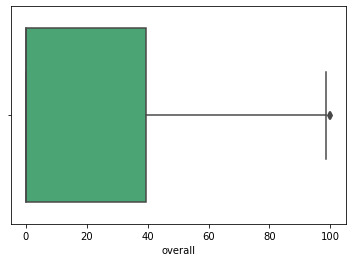

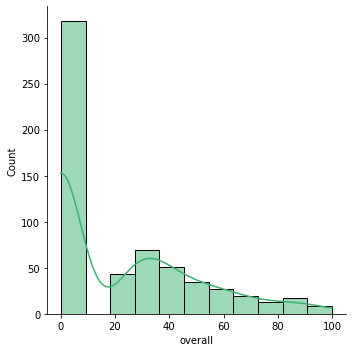

In [33]:
sns.boxplot(x='overall', data=df, color='mediumseagreen')
plt.show()
sns.displot(x='overall',kde=True, data=df, color='mediumseagreen')
plt.show()

Overall heb ik zelf gemaakt, met dat als er een - stond er een 0 werd ingevuld. Dat blijkt een groot deel van de dataset te zijn. Ik besluit deze rij te verwijderen omdat ik de plaats ga voorspellen, de top 5 bijvoorbeeld.

In [34]:
df = df.drop(columns=['overall'])

Daarna valt op binnen de describe() dat de Genderratio NAN en inf laat zien. INF blijkt een infinite aantal te zijn. Die verwijder ik sowieso.

In [35]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

Nu kijk ik naar de overige hoge getallen.

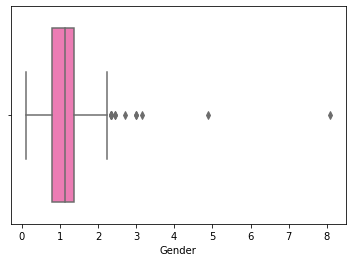

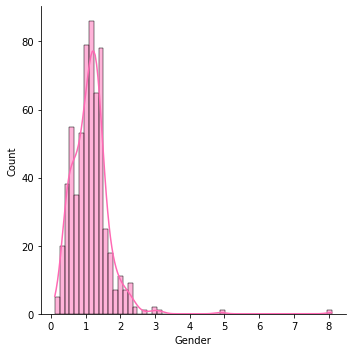

In [36]:
sns.boxplot(x='Gender', data=df, color='hotpink')
plt.show()
sns.displot(x='Gender',kde=True, data=df, color='hotpink')
plt.show()

In [37]:
df['Gender'].max()

8.090909090909092

Het valt op dat het grootste gedeelte net boven de 1 ligt, er zijn dus meer mannen dan vrouwen. Opvallend zijn de uitschieters van de 5 en 8. Bij andere waarden zou ik deze weghalen, maar ik geloof (helaas) wel dat er universiteiten zijn met veel meer mannen dan vrouwen. 

Als laatste zie ik binnen de describe() dat bij de Docent ratio 75% op 0.45 ligt en de max 2.25 is. Dat betekent dat er 2 docenten zijn per 1 student, niet heel waarschijnlijk. Im besluit de twee rijen van boven de 1.5 weg te halen.

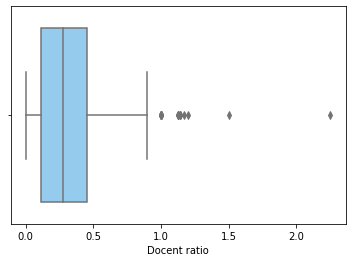

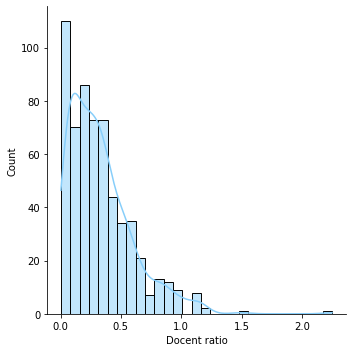

In [38]:
sns.boxplot(x='Docent ratio', data=df, color='lightskyblue')
plt.show()
sns.displot(x='Docent ratio',kde=True, data=df, color='lightskyblue')
plt.show()

In [39]:
df = df[df['Docent ratio']<1.5]
df['Docent ratio'].max()

1.2

## 5. Predictive model - Liniar Regression

build a relevant statistical model or train a machine learning algorithm. Explain which model you have chosen and why you select the variables you do. Explore the parameters. Repeat your model for example with different features, different parameters or a different model.

Ik wil de score van een school gaan voorspellen, en dit doe je door middel van nummerieke data. Daarom maak ik van de andere data dummies om een correlatie te kunnen zien. Daarvoor moet ik eerst de rijen kloppend maken en zo nodig aanpassen.

In [40]:
df['number students'] = df['number students'].str.replace(",", ".", case=False, regex=True)
df['number students'] = df['number students'].astype(float)
df['perc intl students'] = df['perc intl students'].astype(float)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 4 to 599
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   597 non-null    object 
 1   country                 597 non-null    object 
 2   number students         597 non-null    float64
 3   perc intl students      597 non-null    float64
 4   teaching score          597 non-null    float64
 5   research score          597 non-null    float64
 6   citations score         597 non-null    float64
 7   industry income score   597 non-null    float64
 8   intl outlook score      597 non-null    float64
 9   academic reputation     597 non-null    float64
 10  employer reputation     597 non-null    float64
 11  faculty student         597 non-null    float64
 12  international faculty   597 non-null    float64
 13  international students  597 non-null    float64
 14  Gender                  597 non-null    fl

Dan maak ik dummies van de niet nummerieke kolommen.

In [42]:
df = pd.get_dummies(df,columns=['country', 'rating'])
df.head()

,title,number students,perc intl students,teaching score,research score,citations score,industry income score,intl outlook score,academic reputation,employer reputation,...,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Vietnam,rating_lager,rating_top 20,rating_top 5,rating_top 50
4,Massachusetts Institute of Technology,11.276,34.0,90.7,94.4,99.7,90.4,90.0,100.0,100.0,...,0,0,0,0,1,0,0,0,1,0
0,University of Oxford,20.774,41.0,91.3,99.6,98.0,68.7,96.4,100.0,100.0,...,0,0,0,1,0,0,0,0,1,0
5,University of Cambridge,19.370,38.0,90.3,99.2,95.6,52.1,95.7,100.0,100.0,...,0,0,0,1,0,0,0,0,1,0
1,Stanford University,16.223,23.0,92.2,96.7,99.9,90.1,79.5,100.0,100.0,...,0,0,0,0,1,0,0,0,1,0
2,Harvard University,21.261,25.0,94.4,98.8,99.4,46.8,77.7,100.0,100.0,...,0,0,0,0,1,0,0,0,1,0


In [43]:
df = df.drop(columns=['title'])
df.head()

,number students,perc intl students,teaching score,research score,citations score,industry income score,intl outlook score,academic reputation,employer reputation,faculty student,...,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Vietnam,rating_lager,rating_top 20,rating_top 5,rating_top 50
4,11.276,34.0,90.7,94.4,99.7,90.4,90.0,100.0,100.0,100.0,...,0,0,0,0,1,0,0,0,1,0
0,20.774,41.0,91.3,99.6,98.0,68.7,96.4,100.0,100.0,100.0,...,0,0,0,1,0,0,0,0,1,0
5,19.370,38.0,90.3,99.2,95.6,52.1,95.7,100.0,100.0,100.0,...,0,0,0,1,0,0,0,0,1,0
1,16.223,23.0,92.2,96.7,99.9,90.1,79.5,100.0,100.0,100.0,...,0,0,0,0,1,0,0,0,1,0
2,21.261,25.0,94.4,98.8,99.4,46.8,77.7,100.0,100.0,99.1,...,0,0,0,0,1,0,0,0,1,0


In [44]:
corr = df.corr()
corr['rating_top 5'].sort_values(ascending=False)

rating_top 5           1.000000
teaching score         0.359350
research score         0.323988
academic reputation    0.271195
employer reputation    0.262935
                         ...   
number students       -0.022718
country_China         -0.022935
country_Japan         -0.024628
Gender                -0.050693
rating_lager          -0.303971
Name: rating_top 5, Length: 90, dtype: float64

In [45]:
corr2 = df.corr()
corr2['rating_top 20'].sort_values(ascending=False)

rating_top 20          1.000000
teaching score         0.519790
research score         0.492084
academic reputation    0.460309
employer reputation    0.410886
                         ...   
rating_top 50         -0.036928
country_Australia     -0.036928
Gender                -0.040200
country_Japan         -0.043022
rating_lager          -0.530998
Name: rating_top 20, Length: 90, dtype: float64

In [46]:
corr3 = df.corr()
corr3['rating_top 50'].sort_values(ascending=False)

rating_top 50                 1.000000
academic reputation           0.512984
employer reputation           0.481916
research score                0.422779
teaching score                0.389664
                                ...   
country_South Korea          -0.039380
country_Italy                -0.040557
country_Russian Federation   -0.042825
Gender                       -0.052457
rating_lager                 -0.760813
Name: rating_top 50, Length: 90, dtype: float64

In [47]:
corr4 = df.corr()
corr4['rating_lager'].sort_values(ascending=False)

rating_lager                  1.000000
Gender                        0.080758
country_Russian Federation    0.056288
country_Italy                 0.053307
country_South Korea           0.051761
                                ...   
employer reputation          -0.698694
research score               -0.718016
teaching score               -0.719187
academic reputation          -0.753835
rating_top 50                -0.760813
Name: rating_lager, Length: 90, dtype: float64

Gebruik maken van alle kolommen met een hogere correlatie dan 0.25

In [48]:
df_select5 = corr[['rating_top 5', 'teaching score', 'research score', 'academic reputation', 'employer reputation']]

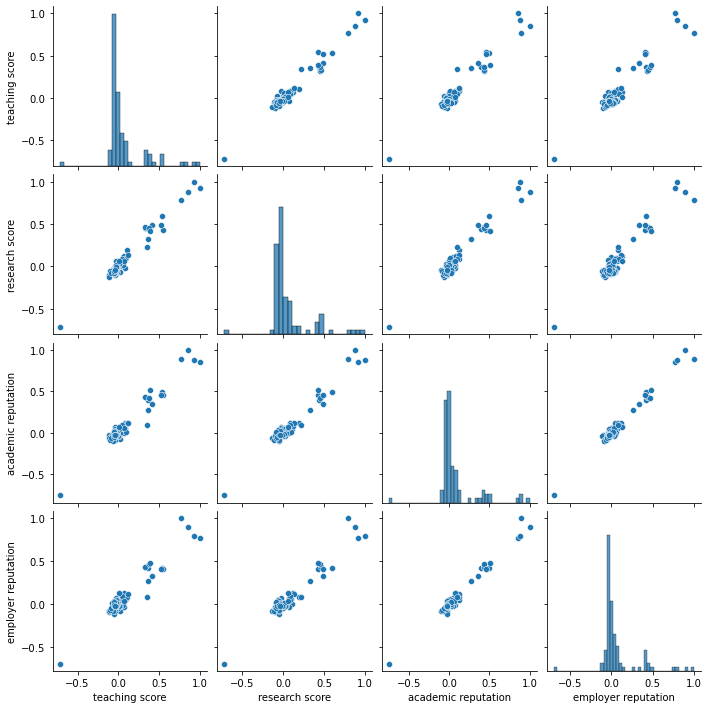

In [49]:
sns.pairplot(df_select5[['teaching score', 'research score', 'academic reputation', 'employer reputation']])
plt.show()

In [52]:
y = df['rating_top 5']
x = df.loc[:, ~df.columns.isin(['rating_top 5'])]
x.head()

,number students,perc intl students,teaching score,research score,citations score,industry income score,intl outlook score,academic reputation,employer reputation,faculty student,...,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Vietnam,rating_lager,rating_top 20,rating_top 50
4,11.276,34.0,90.7,94.4,99.7,90.4,90.0,100.0,100.0,100.0,...,0,0,0,0,0,1,0,0,0,0
0,20.774,41.0,91.3,99.6,98.0,68.7,96.4,100.0,100.0,100.0,...,0,0,0,0,1,0,0,0,0,0
5,19.370,38.0,90.3,99.2,95.6,52.1,95.7,100.0,100.0,100.0,...,0,0,0,0,1,0,0,0,0,0
1,16.223,23.0,92.2,96.7,99.9,90.1,79.5,100.0,100.0,100.0,...,0,0,0,0,0,1,0,0,0,0
2,21.261,25.0,94.4,98.8,99.4,46.8,77.7,100.0,100.0,99.1,...,0,0,0,0,0,1,0,0,0,0


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 57)
x_train.head()

,number students,perc intl students,teaching score,research score,citations score,industry income score,intl outlook score,academic reputation,employer reputation,faculty student,...,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Vietnam,rating_lager,rating_top 20,rating_top 50
173,21.564,10.0,27.9,39.7,69.1,95.1,48.9,10.5,10.8,9.2,...,0,0,0,0,0,1,0,1,0,0
563,8.484,5.0,18.9,13.0,17.5,35.6,32.9,3.5,2.1,17.4,...,0,0,0,0,0,0,0,1,0,0
489,19.294,3.0,18.1,13.7,15.9,36.5,23.3,3.8,3.0,28.4,...,0,0,0,0,0,0,0,1,0,0
151,29.309,9.0,35.8,31.2,83.8,38.5,43.6,13.1,12.9,29.1,...,0,0,0,0,0,1,0,1,0,0
134,13.482,20.0,41.3,44.1,58.0,51.0,88.7,47.3,64.1,69.8,...,0,0,0,0,0,0,0,1,0,0


In [57]:
lm=LinearRegression()
lm=lm.fit(x_train, y_train)
lm.intercept_

1.0000037163046365

In [58]:
pd.DataFrame(x.columns, lm.coef_)

,0
1.685683e-19,number students
-1.702197e-17,perc intl students
9.427138e-17,teaching score
-7.827940e-17,research score
-6.369688e-18,citations score
...,...
-3.716305e-06,country_United States
-3.716305e-06,country_Vietnam
-1.000000e+00,rating_lager
-1.000000e+00,rating_top 20


## 6. Evaluatie

evaluate the model: numerically (using suitable metrics) and qualitatively (in words). Explain what the results mean. Also explain the results in terms of practical value (how good is your model for a potential application).

een 1 toegevoegd voor docenten, aantal verschilt natuurlijk